In [1]:
# Dependencies

import requests
from pprint import pprint
import json

In [86]:
url_weather = ('https://archive-api.open-meteo.com/v1/era5?latitude=52.50&longitude=-1.47&start_date=2022-04-01&end_date=2022-10-15&daily=temperature_2m_max,temperature_2m_min,sunrise,sunset,rain_sum,windspeed_10m_max,winddirection_10m_dominant&timezone=auto&format=json')

r = requests.get(url_weather)

r

<Response [200]>

In [87]:
r.encoding

'utf-8'

In [88]:
type(data_weather)

dict

In [89]:
data_weather.keys()

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])

In [90]:
data_weather = r.json()
#data_weather

In [91]:
real = data_weather['daily']
real.keys()

dict_keys(['time', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset', 'rain_sum', 'windspeed_10m_max', 'winddirection_10m_dominant'])

In [92]:
import pandas as pd
df_weather = pd.DataFrame(real)
df_weather.head()

,time,temperature_2m_max,temperature_2m_min,sunrise,sunset,rain_sum,windspeed_10m_max,winddirection_10m_dominant
0,2022-04-01,7.3,-0.2,2022-04-01T05:38,2022-04-01T18:41,1.0,26.2,93
1,2022-04-02,7.5,-1.4,2022-04-02T05:35,2022-04-02T18:43,1.5,12.7,63
2,2022-04-03,9.6,-2.1,2022-04-03T05:33,2022-04-03T18:44,0.7,20.6,166
3,2022-04-04,12.6,5.3,2022-04-04T05:31,2022-04-04T18:46,5.6,28.6,182
4,2022-04-05,13.0,9.4,2022-04-05T05:28,2022-04-05T18:48,0.7,25.6,185


In [93]:
df_weather.dtypes

time                           object
temperature_2m_max            float64
temperature_2m_min            float64
sunrise                        object
sunset                         object
rain_sum                      float64
windspeed_10m_max             float64
winddirection_10m_dominant      int64
dtype: object

In [94]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
from datetime import date as dt

In [96]:
df_weather['time'] = pd.to_datetime(df_weather['time'])


In [97]:
#Making groups accordind to the month

groups = df_weather.groupby(df_weather.time.dt.month)['temperature_2m_max'].mean()
groups

time
4     13.483333
5     16.980645
6     19.620000
7     23.364516
8     23.832258
9     18.183333
10    15.966667
Name: temperature_2m_max, dtype: float64

Text(0.5, 1.0, 'The Monthly Change of Average Max Temperature 2022')

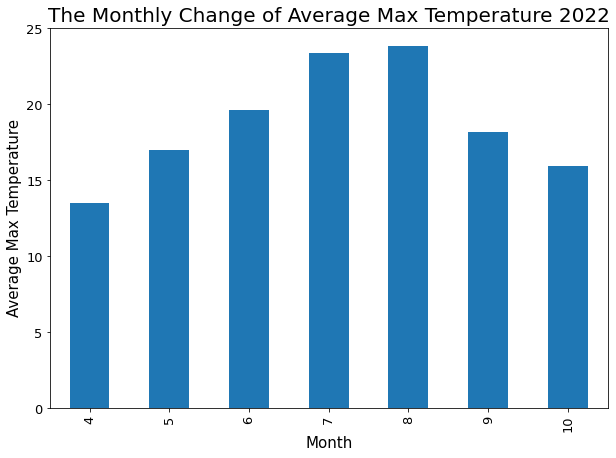

In [108]:
plt.figure(figsize=(10,7))

ax = groups.plot.bar()

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Max Temperature', fontsize=15)
ax.set_title('The Monthly Change of Average Max Temperature 2022', fontsize=20)

Text(0.5, 1.0, 'The Daily Change of Temperature')

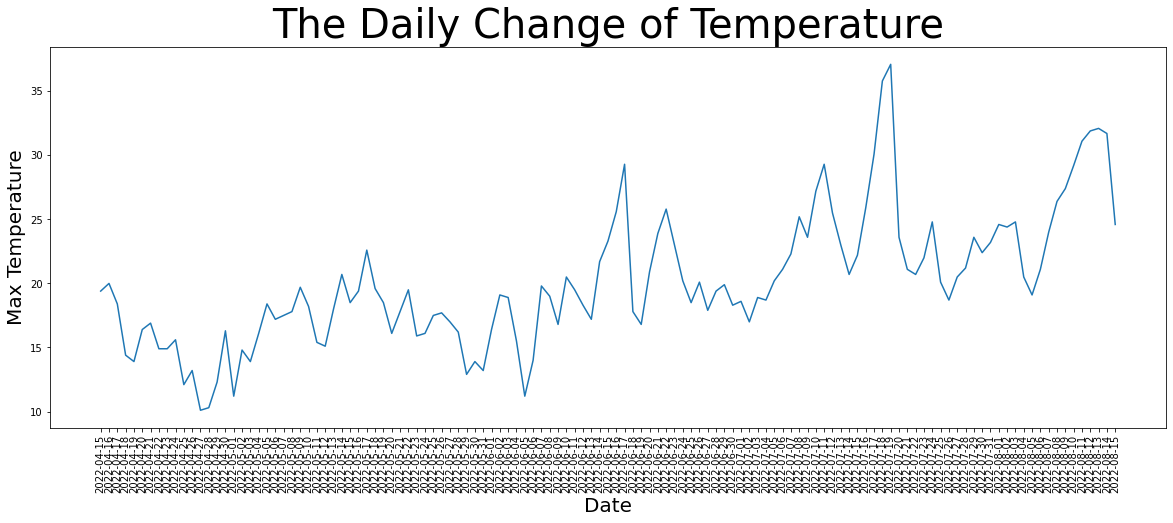

In [74]:
plt.figure(figsize=(20,7))

ax = sns.lineplot(data=df_weather, x='time', y='temperature_2m_max')

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Max Temperature', fontsize=20)
ax.set_title('The Daily Change of Temperature', fontsize=40)

In [120]:
#Grouping for rain

groups_rain = df_weather.groupby(df_weather.time.dt.month)['rain_sum'].mean()
groups_rain

time
4     1.040000
5     2.290323
6     1.620000
7     0.874194
8     1.319355
9     2.503333
10    1.346667
Name: rain_sum, dtype: float64

Text(0.5, 1.0, 'The Monthly Change of Average Rain 2022')

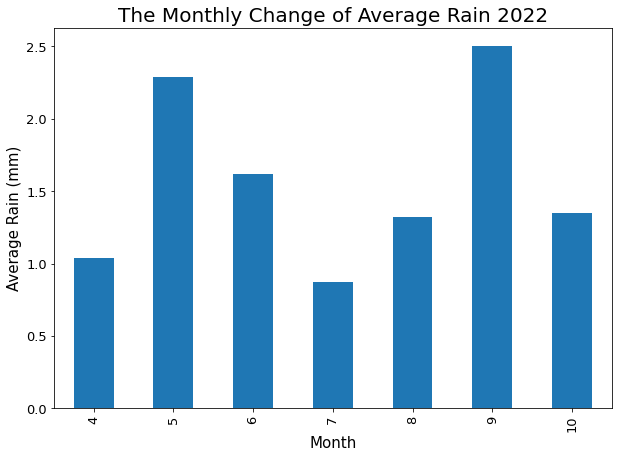

In [124]:
#Making a rain graph of 2022

plt.figure(figsize=(10,7))

ax = groups_rain.plot.bar()

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Rain (mm)', fontsize=15)
ax.set_title('The Monthly Change of Average Rain 2022', fontsize=20)

In [125]:
#humidity

url_humidity = ('https://archive-api.open-meteo.com/v1/era5?latitude=51.42&longitude=-0.21&start_date=2022-04-01&end_date=2022-10-15&hourly=temperature_2m,relativehumidity_2m,apparent_temperature,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m&daily=temperature_2m_max,apparent_temperature_max,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&timezone=auto')

r_humidity = requests.get(url_humidity)

humidity_data = r_humidity.json()

In [128]:
humidity = humidity_data['hourly']
humidity.keys()

dict_keys(['time', 'temperature_2m', 'relativehumidity_2m', 'apparent_temperature', 'cloudcover', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m'])

In [129]:
df_humidity = pd.DataFrame(humidity)
df_humidity.head()

,time,temperature_2m,relativehumidity_2m,apparent_temperature,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
0,2022-04-01T00:00,1.4,74,-4.6,7,1,5,10,23.9,39.5,106,103,47.2
1,2022-04-01T01:00,1.2,76,-4.8,21,1,16,36,24.4,40.3,106,103,47.5
2,2022-04-01T02:00,1.2,76,-4.9,31,8,17,44,24.8,41.0,103,100,47.9
3,2022-04-01T03:00,1.1,78,-4.9,26,7,16,34,24.9,40.7,101,98,47.5
4,2022-04-01T04:00,1.1,79,-4.9,25,8,13,32,24.4,40.6,99,96,47.5


In [130]:
df_humidity['time'] = pd.to_datetime(df_humidity['time'])

In [131]:
groups_humidity = df_humidity.groupby(df_humidity.time.dt.month)['relativehumidity_2m'].mean()
groups_humidity

time
4     71.451389
5     73.930108
6     71.026389
7     62.610215
8     68.212366
9     79.127778
10    81.722222
Name: relativehumidity_2m, dtype: float64

Text(0.5, 1.0, 'The Monthly Change of Humidity 2022')

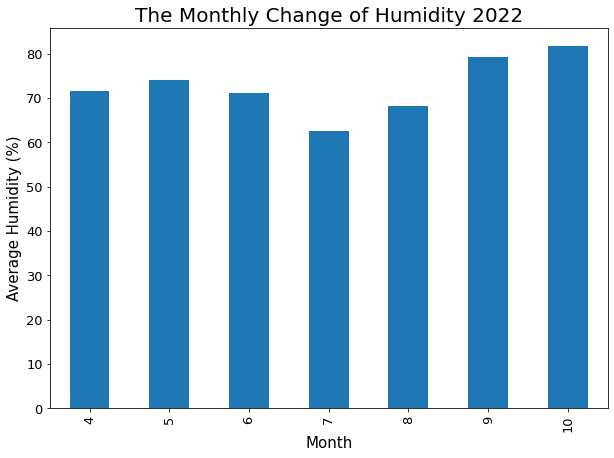

In [132]:
#Making a humidity graph of 2022

plt.figure(figsize=(10,7))

ax2 = groups_humidity.plot.bar()

ax2.tick_params(axis='x', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Average Humidity (%)', fontsize=15)
ax2.set_title('The Monthly Change of Humidity 2022', fontsize=20)